In [1]:
## Importing the Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/home/nitesh/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv('heart.csv')

In [3]:
## Explosring the datasets

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'sex'}>,
        <AxesSubplot: title={'center': 'cp'}>,
        <AxesSubplot: title={'center': 'trestbps'}>],
       [<AxesSubplot: title={'center': 'chol'}>,
        <AxesSubplot: title={'center': 'fbs'}>,
        <AxesSubplot: title={'center': 'restecg'}>,
        <AxesSubplot: title={'center': 'thalach'}>],
       [<AxesSubplot: title={'center': 'exang'}>,
        <AxesSubplot: title={'center': 'oldpeak'}>,
        <AxesSubplot: title={'center': 'slope'}>,
        <AxesSubplot: title={'center': 'ca'}>],
       [<AxesSubplot: title={'center': 'thal'}>,
        <AxesSubplot: title={'center': 'target'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

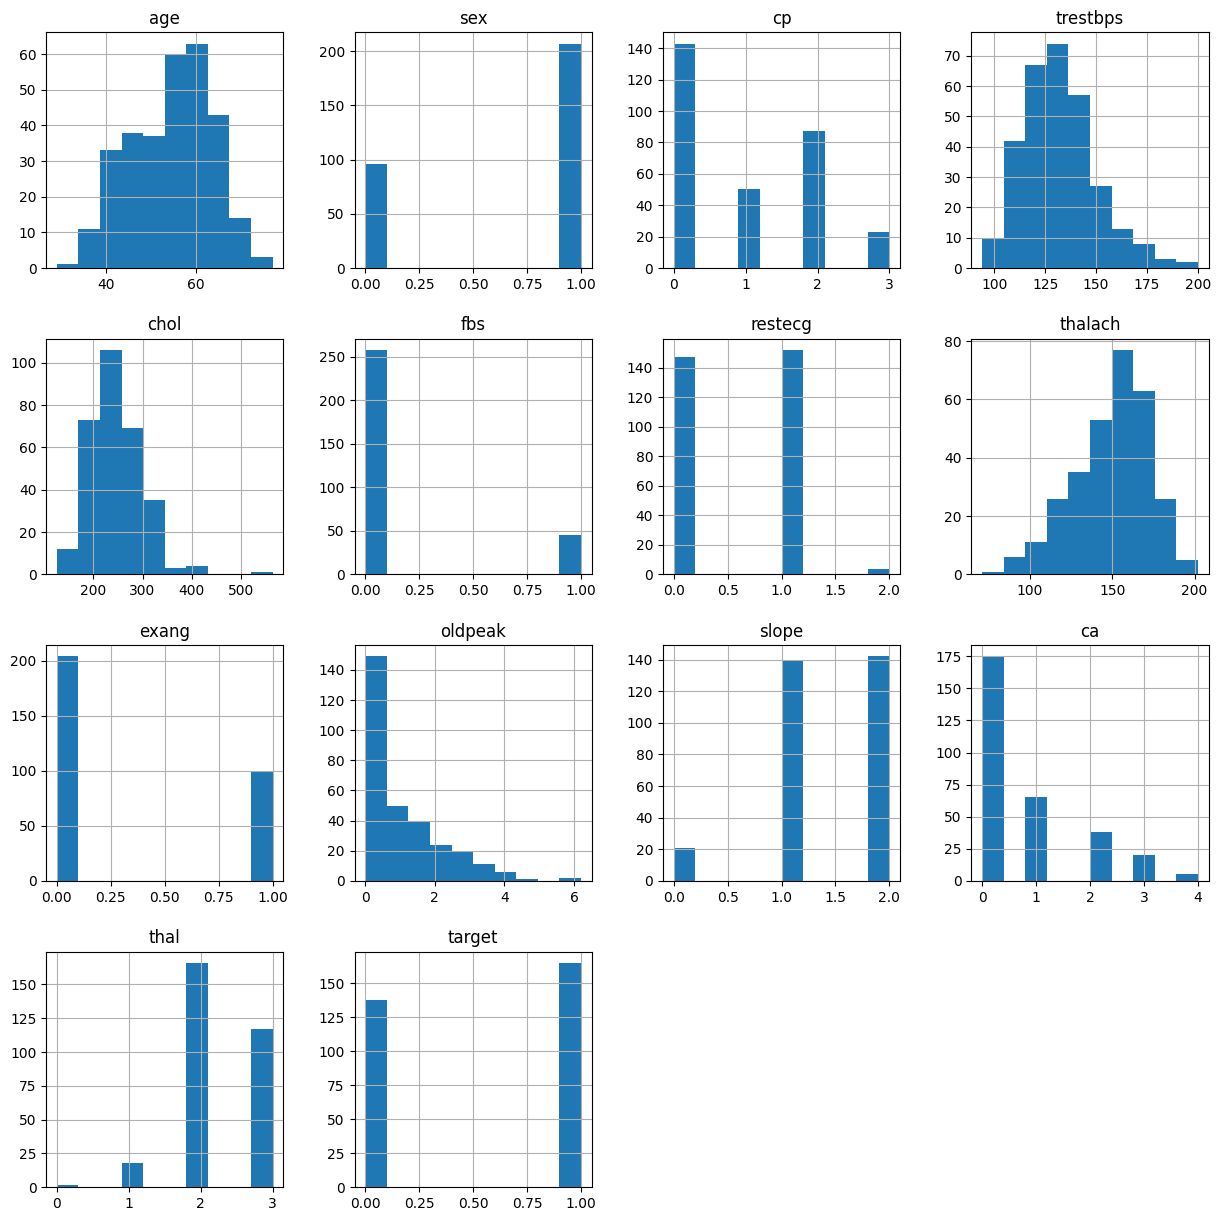

In [10]:
## Data Visualization

df.hist(figsize = (15,15))

<AxesSubplot: xlabel='target', ylabel='count'>

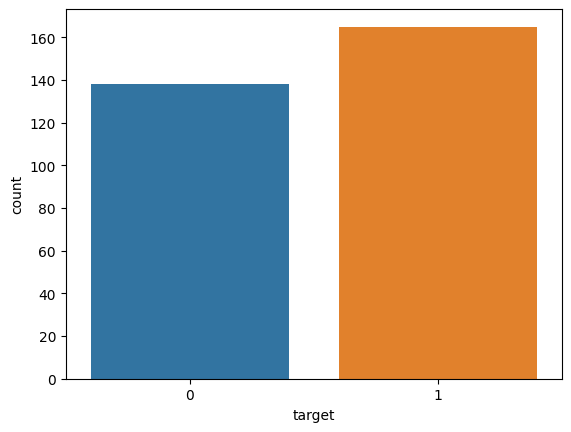

In [11]:
sns.countplot(x = 'target' ,data = df)

## Feature Engineering

In [12]:
corr_mat = df.corr()

top_corr_features = corr_mat.index

In [13]:
top_corr_features

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<AxesSubplot: >

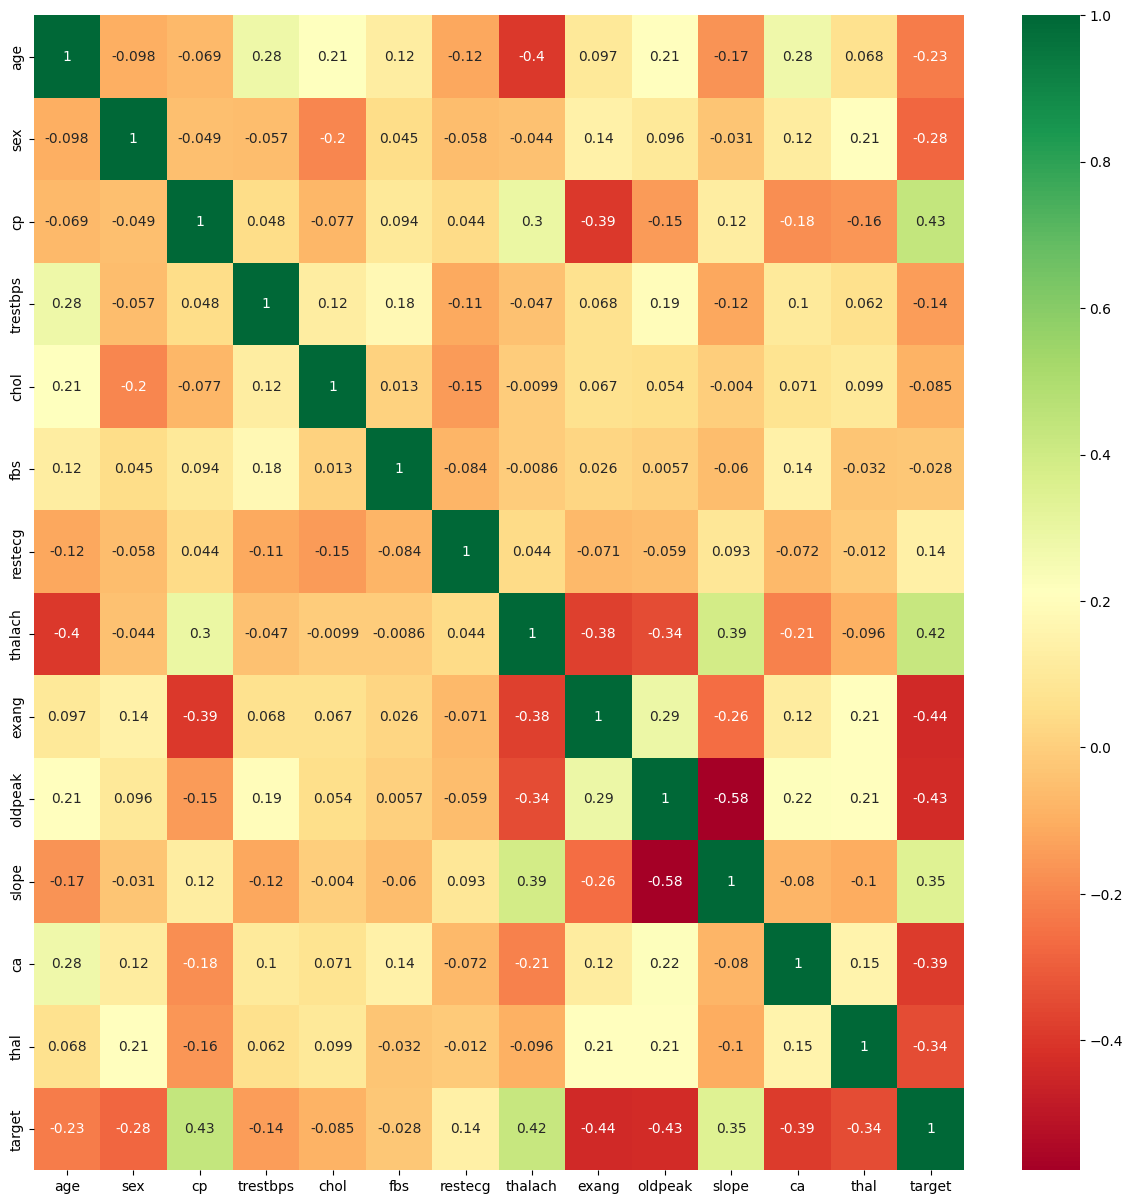

In [14]:
plt.figure(figsize =(15,15))
sns.heatmap(data = df[top_corr_features].corr(), annot=True , cmap = 'RdYlGn')

## Data Preprocessing

In [20]:
### Convert the categorical features into get_dummies


In [17]:
dataset = pd.get_dummies(data = df , columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [18]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## feature scaling

In [21]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
columns_to_scale = ['age' ,'trestbps', 'chol' , 'thalach' , 'oldpeak']
dataset[columns_to_scale] = std.fit_transform(dataset[columns_to_scale])

In [22]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [23]:
X = dataset.drop('target' , axis = 1)
y = dataset['target']

## Model building

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [29]:
knn_scores = []

for i in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    cvs_scores = cross_val_score(knn_classifier , X,y,cv =5)
    knn_scores.append(round(cvs_scores.mean(),3))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

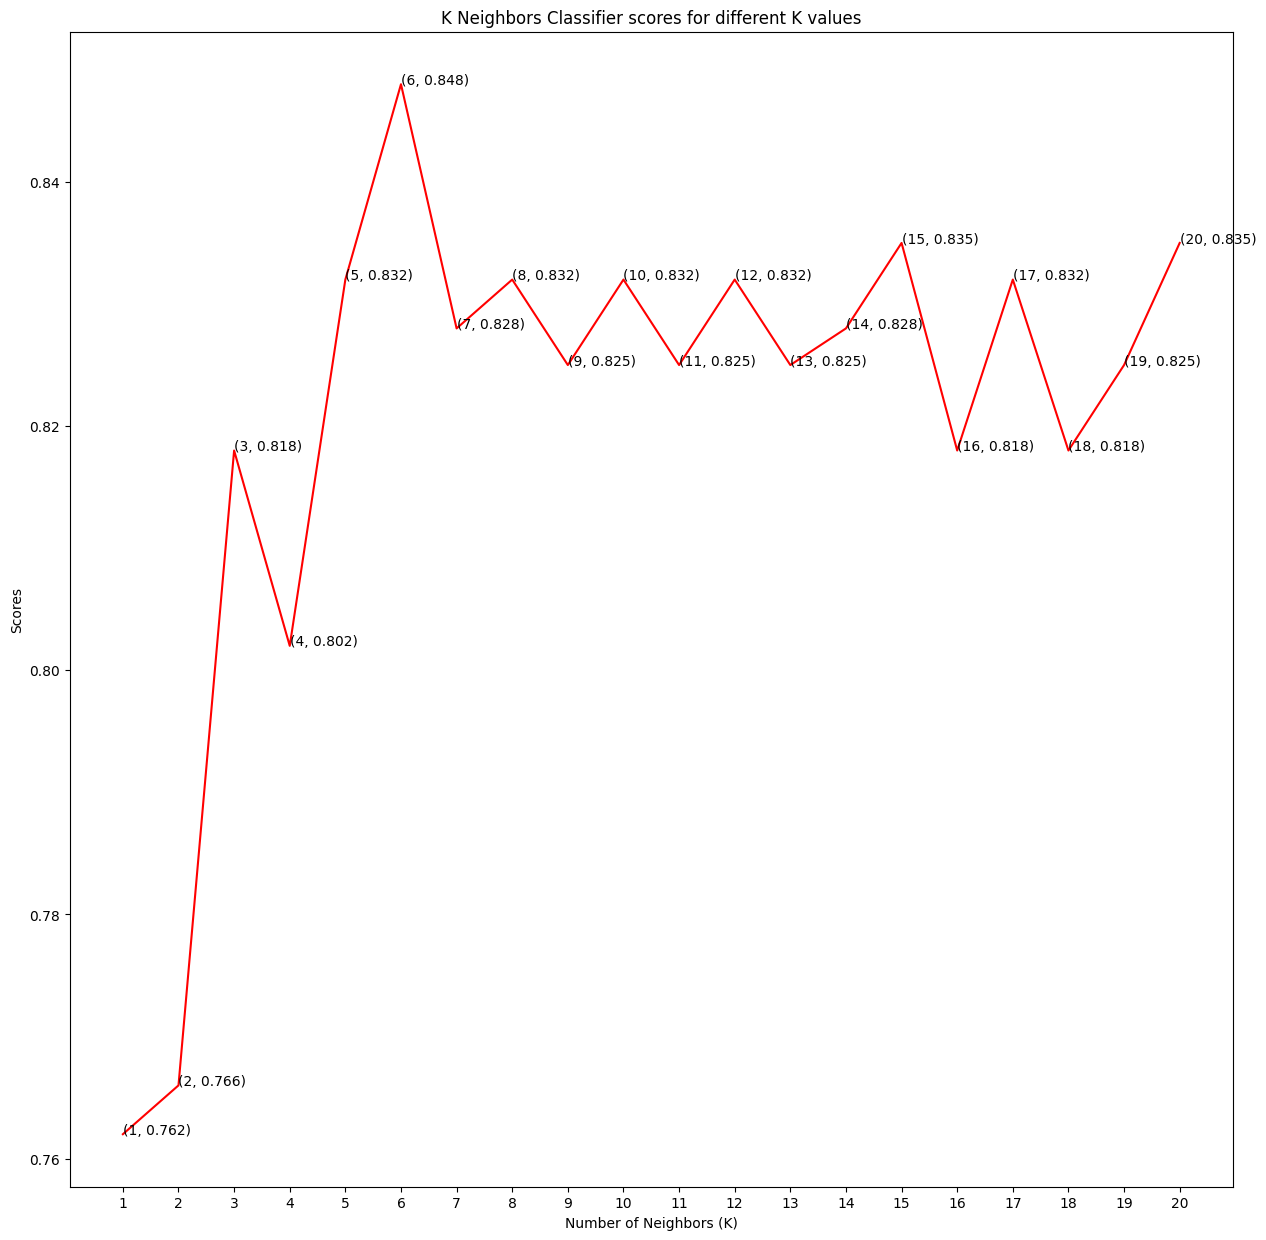

In [30]:
plt.figure(figsize = (15,15))
plt.plot([k for k in range(1,21)] , knn_score , 'r-')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [31]:
# Training the knn classifier model with k value as 12
knn_classifier = KNeighborsClassifier(n_neighbors=12)
cvs_scores = cross_val_score(knn_classifier, X, y, cv=10)
print("KNeighbours Classifier Accuracy with K=12 is: {}%".format(round(cvs_scores.mean(), 4)*100))

KNeighbours Classifier Accuracy with K=12 is: 84.48%


In [32]:
## will train decision tree classifer

from sklearn.tree import DecisionTreeClassifier


In [33]:
decision_scores = []

for i in range(1,11):
    decision_classifier = DecisionTreeClassifier(max_depth=i)
    cvs_scores = cross_val_score(decision_classifier , X,y,cv = 10)
    decision_scores.append(round(cvs_scores.mean() , 3))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different depth values')

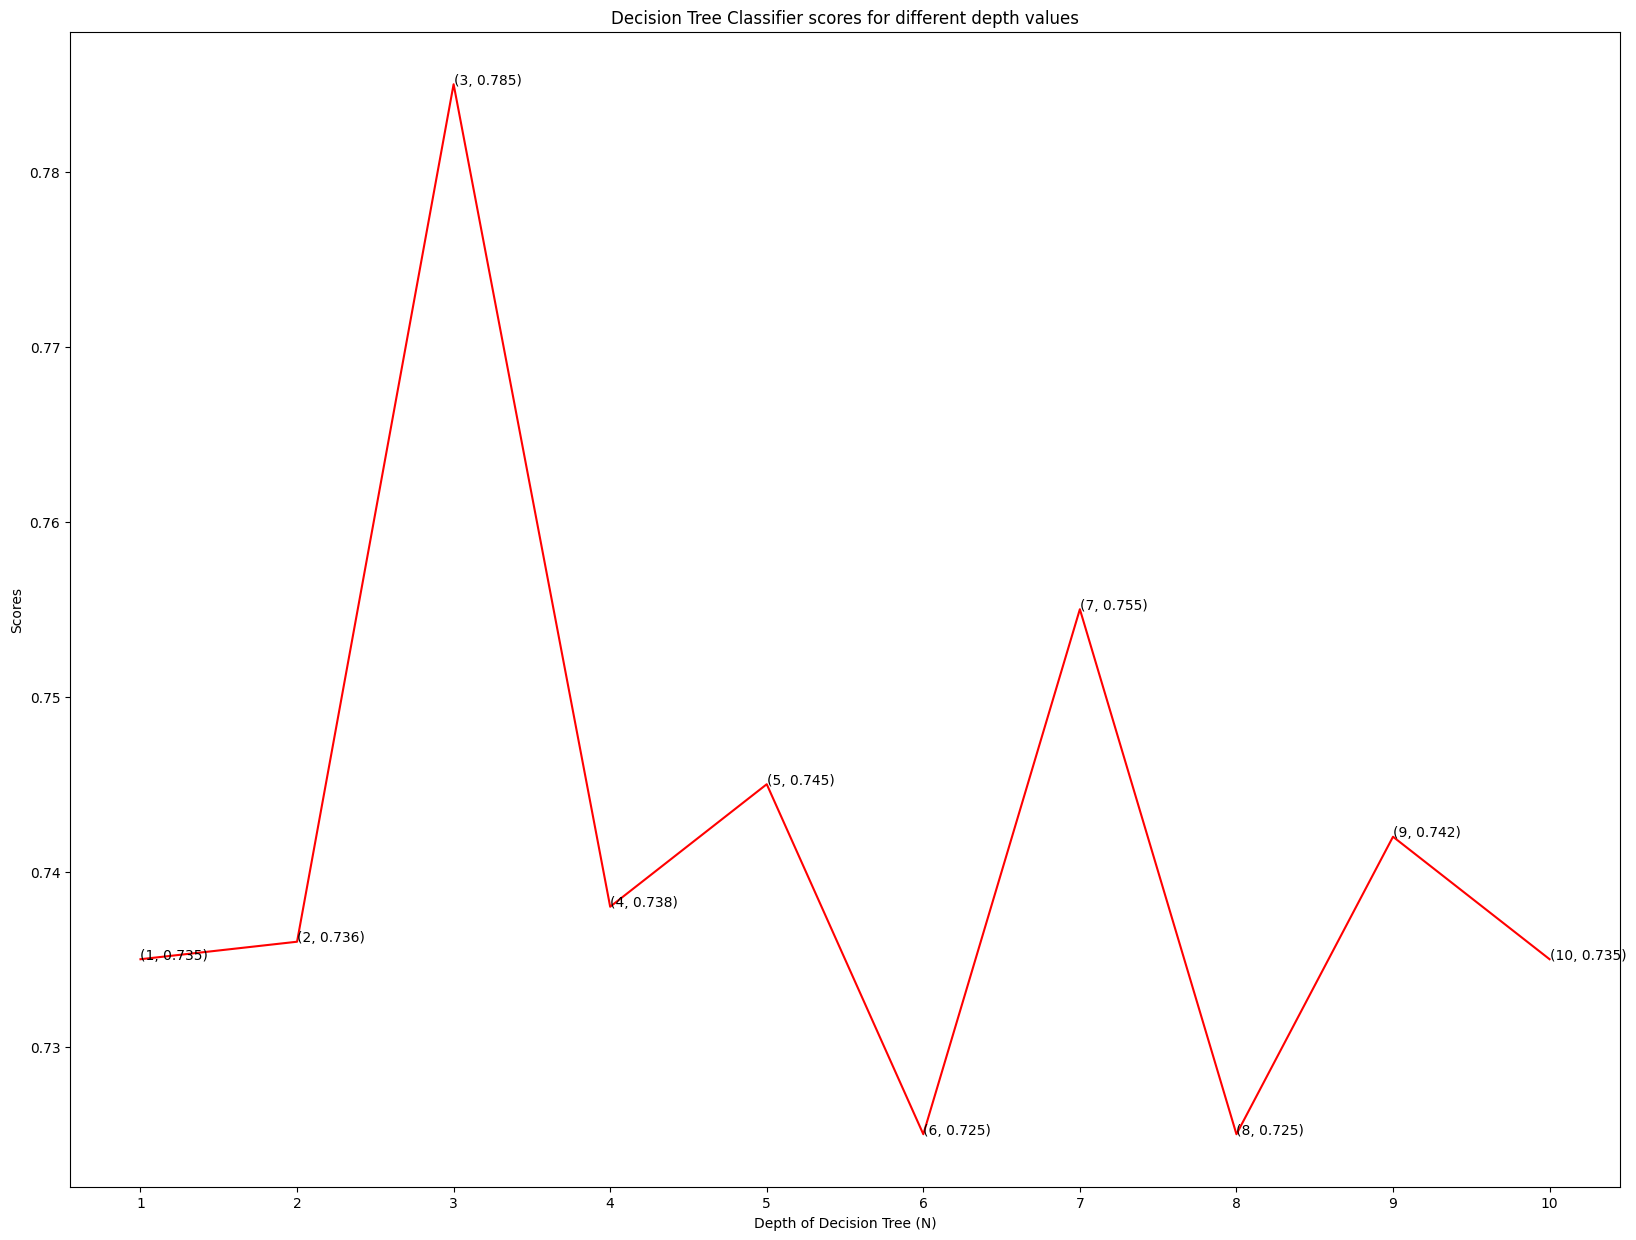

In [34]:
# Plotting the results of decision_scores
plt.figure(figsize=(20,15))
plt.plot([i for i in range(1, 11)], decision_scores, color = 'red')
for i in range(1,11):
    plt.text(i, decision_scores[i-1], (i, decision_scores[i-1]))
plt.xticks([i for i in range(1, 11)])
plt.xlabel('Depth of Decision Tree (N)')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different depth values')

In [35]:
# Training the decision tree classifier model with max_depth value as 3
decision_classifier = DecisionTreeClassifier(max_depth=3)
cvs_scores = cross_val_score(decision_classifier, X, y, cv=10)
print("Decision Tree Classifier Accuracy with max_depth=3 is: {}%".format(round(cvs_scores.mean(), 4)*100))

Decision Tree Classifier Accuracy with max_depth=3 is: 78.51%


## RandomForest classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
# Finding the best accuracy for random forest algorithm using cross_val_score 
forest_scores = []
for i in range(10, 101, 10):
    forest_classifier = RandomForestClassifier(n_estimators=i)
    cvs_scores = cross_val_score(forest_classifier, X, y, cv=5)
    forest_scores.append(round(cvs_scores.mean(),3))

Text(0.5, 1.0, 'Random Forest Classifier scores for different N values')

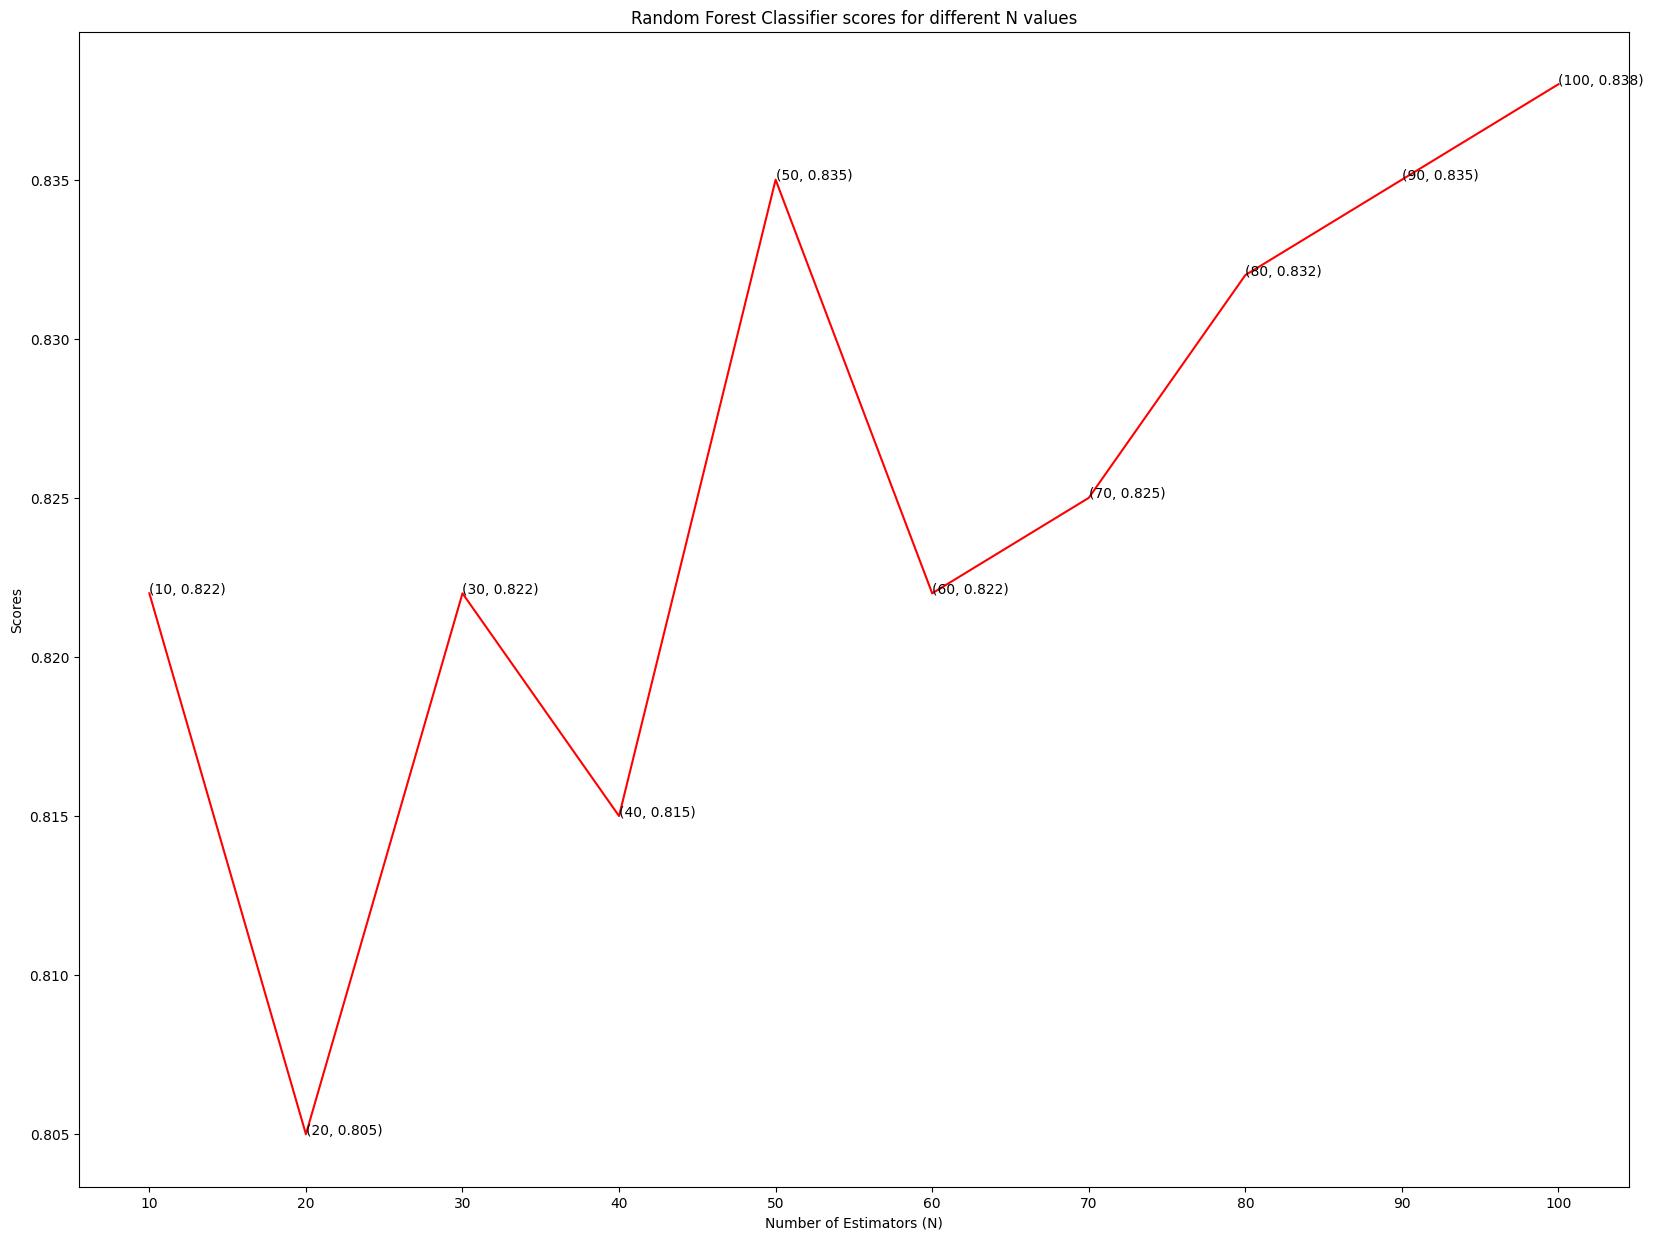

In [39]:
# Plotting the results of forest_scores
plt.figure(figsize=(20,15))
plt.plot([n for n in range(10, 101, 10)], forest_scores, color = 'red')
for i in range(1,11):
    plt.text(i*10, forest_scores[i-1], (i*10, forest_scores[i-1]))
plt.xticks([i for i in range(10, 101, 10)])
plt.xlabel('Number of Estimators (N)')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different N values')

In [40]:
# Training the random forest classifier model with n value as 90
forest_classifier = RandomForestClassifier(n_estimators=90)
cvs_scores = cross_val_score(forest_classifier, X, y, cv=5)
print("Random Forest Classifier Accuracy with n_estimators=90 is: {}%".format(round(cvs_scores.mean(), 4)*100))

Random Forest Classifier Accuracy with n_estimators=90 is: 82.83%
